In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mtj_module
from scipy.signal import argrelmax
from scipy.interpolate import interp1d

# dynamic of spin-torque oscillator

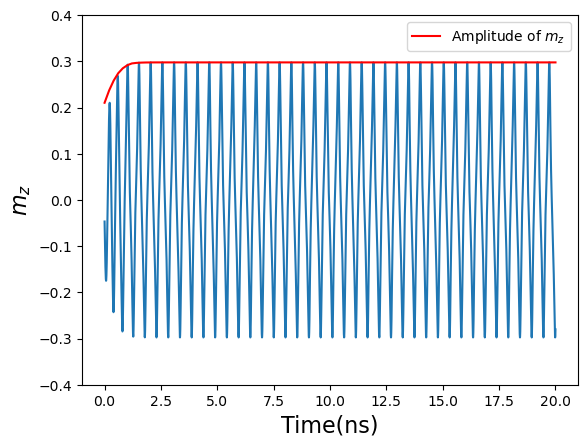

In [13]:
for i in range(1):
    np.random.seed(i)
    initial_m = np.random.random(3)
    device = mtj_module.Mtj(initial_m[0], initial_m[1], initial_m[2])
    device.time_evolution(dc_amplitude=100, time_consumed=10e-9)
    _, _, mz_list, t_list, _ = device.time_evolution(dc_amplitude=200, time_consumed=20e-9)
    # print(mz_list, t_list)
    mz_list_all = mz_list[argrelmax(mz_list)]
    xp = np.linspace(1, len(mz_list_all), len(mz_list_all))
    fp = mz_list_all
    sampling_x_values = np.linspace(1, len(mz_list_all), 100)
    # linear slinear quadratic cubic
    f = interp1d(xp, fp, kind='quadratic')
    mz_sampling = f(sampling_x_values)
    t_list = [i*1e9 for i in t_list]
    t_list_amplitude = np.linspace(np.min(t_list), np.max(t_list), 100)
    plt.figure('test')
    plt.plot(t_list, mz_list)
    plt.plot(t_list_amplitude, mz_sampling, c='red', label=r'Amplitude of $m_z$')
    plt.legend()
    plt.xlabel('Time(ns)', size=16)
    plt.ylabel(r'$m_z$', size=16)
    plt.ylim([-0.4, 0.4])

# plt.savefig('dynamics_200Oe.svg', format='svg')
# plt.savefig('dynamics_100Oe.svg', format='svg')
plt.show()

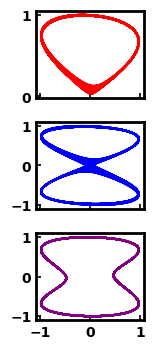

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mtj_module
from scipy.signal import argrelmax
from scipy.interpolate import interp1d

FontSize = 40
negative_lyapunov_demo = mtj_module.Mtj(x0=1.0, y0=1.0, z0=0.1)
zero_lyapunov_demo = mtj_module.Mtj(x0=1.0, y0=1.0, z0=0.1)
positive_lyapunov_demo = mtj_module.Mtj(x0=1.0, y0=1.0, z0=0.1)

_, my_n, mz_negative, t_n, _ = negative_lyapunov_demo.time_evolution(dc_amplitude=200, time_consumed=3e-8)
_, my_e, mz_edge, t_e, _ = zero_lyapunov_demo.time_evolution(dc_amplitude=269, ac_amplitude=26, time_consumed=3e-8)
_, my_c, mz_chaos, t_p, _ = positive_lyapunov_demo.time_evolution(ac_amplitude=26, dc_amplitude=260, time_consumed=3e-8)

# normalized
mz_negative /= np.max(mz_negative[int(len(my_n)/2):])
mz_edge /= np.max(mz_edge[int(len(my_n)/2):])
mz_chaos = mz_chaos/np.max(np.abs(mz_chaos[int(len(my_n)/2):]))

figure = plt.figure('in_set of FIG2_01', figsize=[1.64, 1.2])
ax = figure.add_subplot(111)
ax.yaxis.tick_right()
# plt.ylabel(r'$m_z$', fontsize=FontSize)
# plt.xlabel(r'$m_y$', fontsize=FontSize)
plt.plot(my_e[int(len(my_n)/2):], mz_edge[int(len(my_n)/2):], c='red')
# plt.axis('off')
plt.xticks([-1, 0, 1])
plt.yticks([0, 0.3])
# save_path = os.path.join(os.getcwd(), 'FIGURES_PAPER')
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
save_path = f'figs/dynamics'
if not os.path.exists(save_path):
    os.mkdir(save_path)
plt.tight_layout()
plt.savefig(f'{save_path}/FIG_1_inset01.svg', dpi=1200, format='svg')
# plt.show()

figure = plt.figure('in_set of FIG2_02', figsize=[1.64, 1.2])
ax = figure.add_subplot(111)
ax.yaxis.tick_right()
# plt.ylabel(r'$m_z$', fontsize=FontSize)
# plt.xlabel(r'$m_y$', fontsize=FontSize)
plt.plot(my_c[int(len(my_n)/2):], mz_chaos[int(len(my_n)/2):], c='blue')
plt.xticks([-1, 0, 1])
plt.yticks([-0.3, 0, 0.3])
# save_path = os.path.join(os.getcwd(), 'FIGURES_PAPER')
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
ax = plt.axes()
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())

plt.tight_layout()
plt.savefig(f'{save_path}/FIG_1_inset02.svg', dpi=1200, format='svg')

figure = plt.figure('in_set of FIG2_03', figsize=[1.64, 1.2])
ax = figure.add_subplot(111)
ax.yaxis.tick_right()
# plt.ylabel(r'$m_z$', fontsize=FontSize)
# plt.xlabel(r'$m_y$', fontsize=FontSize)
plt.plot(my_n[int(len(my_n)/2):], mz_negative[int(len(my_n)/2):], c='purple')
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
# save_path = os.path.join(os.getcwd(), 'FIGURES_PAPER')
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
plt.tight_layout()
plt.savefig(f'{save_path}/FIG_1_inset03.svg', dpi=1200, format='svg')
# plt.show()
plt.close('all')


# subplot plotting
plt.rcParams.update({'font.weight': 'bold', 'axes.labelweight': 'bold'})
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False, figsize=[1.64, 3.6])
ax[0].plot(my_e[int(len(my_n)/2):], mz_edge[int(len(my_n)/2):], c='red')
ax[1].plot(my_c[int(len(my_n)/2):], mz_chaos[int(len(my_n)/2):], c='blue')
ax[2].plot(my_n[int(len(my_n)/2):], mz_negative[int(len(my_n)/2):], c='purple')

# plt.xticks([-1, 0, 1], weight=5)
# plt.yticks([-1, 0, 1], weight=10)

# ax[0].spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)
# ax[1].spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)
# ax[2].spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)

for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(2))
    # print(plt.MaxNLocator(2))
    # axi.set_xticklabels(fontweight=2)
    # axi.yaxis.tick_right()
    axi.yaxis.set_major_locator(plt.MaxNLocator(2, integer=True))
    axi.tick_params(axis='both', direction='in', width=1.2)
    axi.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)
    
fig.tight_layout()
fig.savefig(f'{save_path}/FIG_1_inset_all.svg', dpi=1200, format='svg')
fig.show()


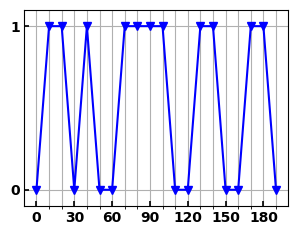

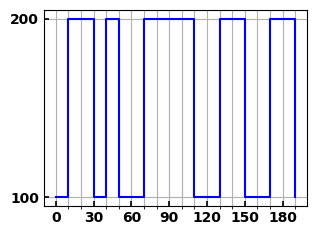

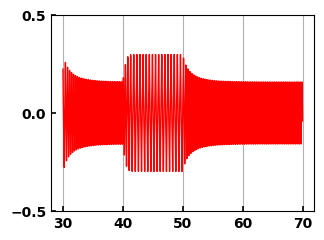

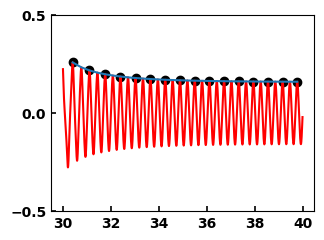

In [6]:
FontSize = 16
LabelSize = 15
oscillator_device = mtj_module.Mtj(x0=1, y0=0.01, z0=0.01)
s_in = np.random.randint(0, 2, 20)
s_in = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
mx_whole = []
dc_list = []
time_consume = 10e-9
for i in s_in:
    if i == 1:
        dc_amplitude = 200
    else:
        dc_amplitude = 100
    dc_list.append(dc_amplitude)
    _, _, mx_list, t_list, _ = oscillator_device.time_evolution(dc_amplitude=dc_amplitude,
                                                                time_consumed=time_consume)

    mx_whole = np.append(mx_whole, mx_list)
 
    if len(dc_list) == 2:
        # sampling points
        length_mx = len(mx_list)
        nodes_stm = 10
        mz_list_all = mx_list[argrelmax(mx_list)]
        t_list_all = t_list[argrelmax(mx_list)]
        xp = np.linspace(1, len(mz_list_all), len(mz_list_all))
        fp = mz_list_all
        sampling_x_values = np.linspace(1, len(mz_list_all), nodes_stm)
        # linear slinear quadratic cubic
        f = interp1d(xp, fp, kind='quadratic')
        mz_sampling = f(sampling_x_values)

t_in = np.linspace(0, len(s_in) - 1, len(s_in)) * time_consume
plt.rcParams.update({'font.weight': 'bold', 'axes.labelweight': 'bold'})
fig = plt.figure('fig2_a', figsize=[3.4, 2.55])
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', direction='in', width=1.2)
major_x_ticks = t_in[::3]  * 1e9
minor_x_ticks = t_in * 1e9
ax.plot(t_in * 1e9, s_in, c='blue', label='inputs', marker='v')
ax.set_xticks(major_x_ticks)
ax.set_xticks(minor_x_ticks, minor=True)
ax.grid(which='both')

# plt.xlabel('Time(ns)', fontsize=FontSize)
# plt.ylabel(r'$S_{in}$', fontsize=FontSize)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1])
# plt.xticks(t_in[::2] * 1e9)
save_path = f'figs/dynamics'
plt.savefig(f'{save_path}/FIG_3_01.svg', dpi=600, format='svg')
plt.show()

fig = plt.figure('fig2_b', figsize=[3.4, 2.55])
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', direction='in', width=1.2)
dc_real = []
t_dc = []
for i in range(len(dc_list)):
    if s_in[i] != s_in[i - 1] and i != 0:
        dc_real.append(dc_list[i - 1])
        t_dc.append(t_in[i] * 1e9)

    dc_real.append(dc_list[i])
    t_dc.append(t_in[i] * 1e9)
# t_in = np.linspace(0, len(s_in) - 1, len(dc_real)) * 8e-9
plt.plot(t_dc, dc_real, c='blue', label='real inputs')
# plt.grid(axis='x')
# plt.xlabel(r'T(ns)', fontsize=FontSize)
# plt.ylabel('DC Effective Field (Oe)', fontsize=FontSize)
# plt.xlabel('Time(ns)', fontsize=FontSize)
ax.set_xticks(major_x_ticks)
ax.set_xticks(minor_x_ticks, minor=True)
ax.grid(which='both')
plt.yticks([100, 200])
plt.savefig(f'{save_path}/FIG_3_02.svg', dpi=600, format='svg')

fig = plt.figure('fig2c', figsize=[3.4, 2.55])
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', direction='in', width=1.2)
t_whole = np.linspace(0, len(s_in), len(mx_whole)) * time_consume
plt.grid(axis='x')
# plt.ylabel(r'$m_z$', fontsize=FontSize)
# plt.xlabel('Time(ns)', fontsize=FontSize)
plt.plot(t_whole[int(length_mx*3):length_mx*7] * 1e9, mx_whole[int(length_mx*3):length_mx*7], c='red', linewidth=1)
# x_ticks = np.linspace(0, 80, 11)
plt.xticks(minor_x_ticks[3:8])
# plt.ylim(-1.1, 1.1)
plt.yticks([-0.5, 0, 0.5])
plt.savefig(f'{save_path}/FIG_3_03.svg', dpi=600, format='svg')

# plt.figure('FIG3 01 switch ESN')
fig = plt.figure('fig2d', figsize=[3.4, 2.55])
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', direction='in', width=1.2)
# plt.xlabel('Time(ns)', fontsize=FontSize)
# plt.ylabel(r'$m_z$', fontsize=FontSize)
plt.plot(t_whole[length_mx*3:length_mx*4] * 1e9, mx_whole[length_mx*3:length_mx*4], c='red')
length_mx = len(mx_list)
nodes_stm = 10
mx_list = np.array(mx_whole[length_mx*3:length_mx*4])
t_list = t_whole[length_mx*3:length_mx*4]
mz_list_all_0 = mx_list[argrelmax(mx_list)]
t_list_all_0 = t_list[argrelmax(mx_list)]
mz_list_all = mz_list_all_0[np.arange(0, len(mz_list_all_0), 2)]
t_list_all = t_list_all_0[np.arange(0, len(t_list_all_0), 2)]
plt.plot(t_list_all_0 * 1e9, mz_list_all_0)
plt.scatter(t_list_all * 1e9, mz_list_all, c='black')
# plt.ylim(-1.1, 1.1)
plt.yticks([-0.5, 0, 0.5])
# save_path = os.path.join(os.getcwd(), 'FIGURES_PAPER')
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
# plt.savefig(f'{save_path}/FIG_3_02.png', dpi=1200)
plt.savefig(f'{save_path}/FIG_3_04.svg', dpi=600, format='svg')
plt.show()

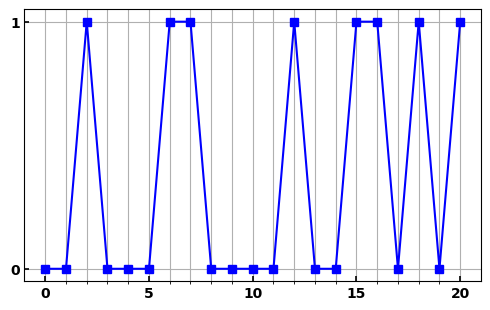

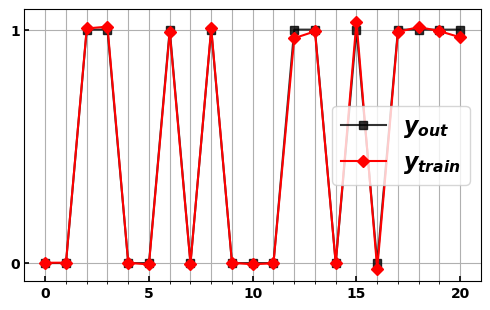

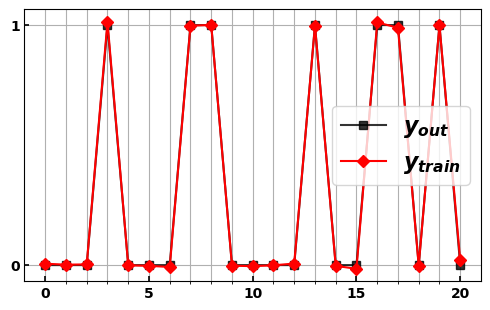

In [9]:
consuming_time=4e-9 
ac_current=1
node = 100
superposition_list = [1]
ratio = 0.5
file_path = f'weight_evolution_{consuming_time}/weight_posibility_{ratio}'
input_path='test_random_input'
input_data_file = pd.read_csv(f'{input_path}/input_ratio_{ratio}_{consuming_time}_{ac_current}.csv')
s_in = input_data_file['s_in'].to_numpy()
task_list = ['Parity', 'Delay']

# plt.figure(figsize=[10, 6])
# plt.figure(figsize=[5.89, 3.53])
fig, ax = plt.subplots(figsize=[5.89, 3.53])
ax.tick_params(axis='both', direction='in', width=1.2)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(s_in[15:36], marker='s', c='blue')
major_x_ticks = [0, 5, 10, 15, 20]
minor_x_ticks = np.linspace(0, 20, 21, dtype=int)

ax.set_xticks(major_x_ticks)
ax.set_xticks(minor_x_ticks, minor=True)
ax.grid(which='both')
# plt.xlabel('Time', size=16)
# plt.ylabel(r'$S_{in}$', size=16)
plt.yticks([0, 1])
plt.savefig(f'figs/dynamics/input_example02.svg', dpi=600, format='svg')
plt.show()
for task in task_list:
    for superposition in superposition_list:
        weight_out = np.load(f'{file_path}/STM_{task}_{superposition}_node_{node}_ac_{ac_current}.npy')
        
        # loading training data
        if task == 'Delay':
            test_signal = np.append(s_in[-int(superposition):], s_in[:-int(superposition)])

        elif task == 'Parity':
            test_signal = s_in
            for super_value in range(1, superposition + 1):
                temp_signal = np.append(s_in[-int(super_value):], s_in[:-int(super_value)])
                test_signal = test_signal + temp_signal
                test_signal[np.argwhere(test_signal == 2)] = 0

        x_final_matrix = []
        for index in range(len(s_in)):
            # update weight
            mz_amplitude = input_data_file[f'mz_list_amplitude_{index}']
            mz_amplitude = mz_amplitude[~np.isnan(mz_amplitude)]
            xp = np.linspace(1, len(mz_amplitude), len(mz_amplitude))
            fp = mz_amplitude
            sampling_x_values = np.linspace(1, len(mz_amplitude), node)
            f = interp1d(xp, fp, kind='quadratic')
            x_matrix = f(sampling_x_values)
            x_matrix = np.append(x_matrix.T, 1).reshape(-1, 1)
            x_final_matrix.append(x_matrix.T.tolist()[0])
                
        x_final_matrix = np.asmatrix(x_final_matrix).T
        y_test = np.dot(weight_out, x_final_matrix)[0].T

        fig, ax = plt.subplots(figsize=[5.89, 3.53])
        ax.tick_params(axis='both', direction='in', width=1.2)
        plt.xticks([0, 5, 10, 15, 20])
        # plt.plot(s_in[15:36], marker='s', c='blue')
        major_x_ticks = [0, 5, 10, 15, 20]
        minor_x_ticks = np.linspace(0, 20, 21, dtype=int)

        ax.set_xticks(major_x_ticks)
        ax.set_xticks(minor_x_ticks, minor=True)
        ax.grid(which='both')

        plt.plot(test_signal[15:36], marker='s', label=r'$y_{out}$', c='black', alpha=0.8)
        plt.plot(y_test[15:36], marker='D', label=r'$y_{train}$', c='red', alpha=1)
        # plt.xlabel('Time', size=16)
        # if task == 'Delay':
        #     plt.ylabel(r'$y_{STM}$', size=16)
        # else:
        #     plt.ylabel(r'$y_{PC}$', size=16)
        plt.legend(loc='center right', fontsize=16)
        plt.yticks([0, 1])
        plt.savefig(f'figs/dynamics/{task}_example02.svg', dpi=600, format='svg')
plt.show()